In [1]:
import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics 
from sklearn.model_selection import cross_val_score

In [2]:
os.chdir("C:\\Nastaran\\Spring2019\\Python\\Online_shoppers_intention")

data = pd.read_csv("online_shoppers_intention.csv", sep=',')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.

The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.

The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

## Data Analysis

### Revenue Based Analysis

#### Revenue vs not revenue on the visits

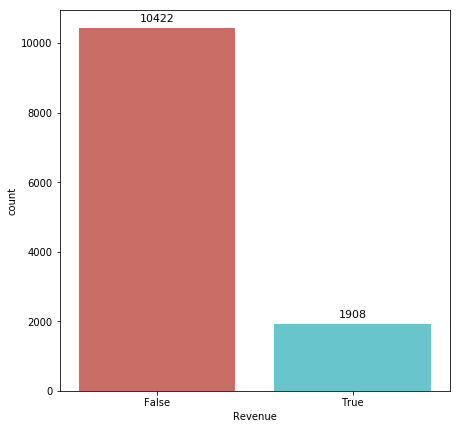

In [5]:
plt.figure(figsize=(7,7))

ax = sns.countplot(x='Revenue',data=data, palette='hls')

# Adding respective values to the top of each bar
for p in ax.patches: 
    ax.annotate("%i" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10), 
                textcoords='offset points')

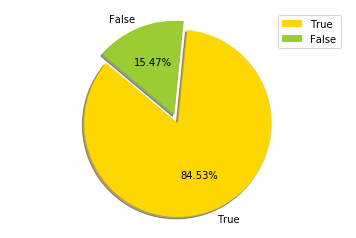

In [40]:
# Data to plot
labels = 'True', 'False'

sizes = []
length = data.Revenue.shape[0]
for i in data.Revenue.value_counts().values:
    sizes.append(round((i/length*100),2))
    
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%'.format(p=pct)
    return my_autopct


# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140, autopct=make_autopct(sizes))
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.show()


### As it is clear from pie plot, among the all website visits, 15.47% of them finally had revenue for website.

#### Most Revnue is made on weekends or not?

In [85]:
cnt = 0
for index, row in data.iterrows():
    for i in row.index.tolist():
        if ((i == "Weekend")&(row[i] == True)) & (row["Revenue"] == True) == True:
            cnt+=1
cnt

499

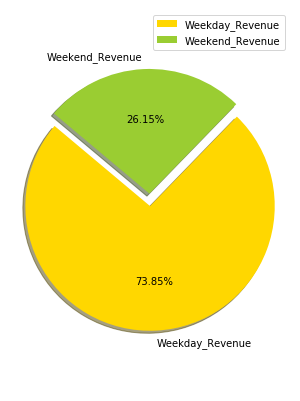

In [105]:
Weekend_Revenue = data[(data.Revenue == True) & (data.Weekend == True)].shape[0] / data[data.Revenue == True].shape[0]
Weekday_Revenue = data[(data.Revenue == True) & (data.Weekend == False)].shape[0] / data[data.Revenue == True].shape[0]
label = ["Weekday_Revenue", "Weekend_Revenue"]
size = [Weekday_Revenue, Weekend_Revenue]

# Plot
plt.figure(figsize=(5,7))
plt.pie(size, explode=explode, labels=label, colors=colors, shadow=True, startangle=140, autopct=make_autopct(size))
plt.legend(patches, label, loc="upper right")
plt.axis('equal')
plt.show()


In [79]:
cnt = 0
for index, row in data.iterrows():
    l = row.index.tolist()

print (l)

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']


###### Code for multiple measues in barchart

In [ ]:
#col should be less than 15 categories 
def plot_multiple_bar(col,list_of_measures,dataframe):
    
    temp_df = dataframe.groupby([col]).mean()[list_of_measures].reset_index()
    temp_df_melt = pd.melt(temp_df, id_vars=col, var_name="Parameters", value_name="Values")
    g =sns.factorplot(x=col, y='Values',hue ='Parameters', data=temp_df_melt, kind='bar',legend=False,size =7)
    g.set_xticklabels(fontsize='20')
    g.set_yticklabels(fontsize='20')
    g.set_xlabels(fontsize='20')
    g.set_ylabels(fontsize='20')
    g.add_legend(fontsize='20')

#### Region that had most revenue:

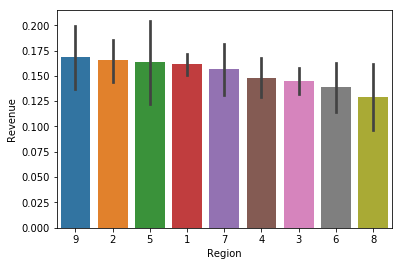

In [107]:
a = data.groupby(["Region"]).mean().reset_index().sort_values(["Revenue"], ascending=False)
sns.barplot(x="Region", y="Revenue", data=data, order=a['Region'])

#### The region 9 made the highest revenue!

### Does the regions have same result if we consider the revenues on weekends?

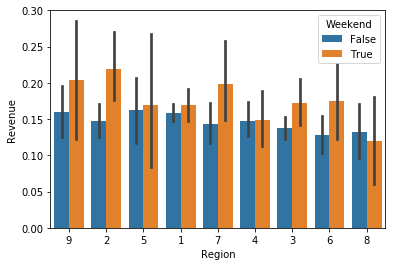

In [53]:
a = data.groupby(["Region"]).mean().reset_index().sort_values(["Revenue"], ascending=False)
sns.barplot(x="Region", y="Revenue", hue = "Weekend", data=data, order=a['Region'])

#### Which type of visitores made the most revenue?

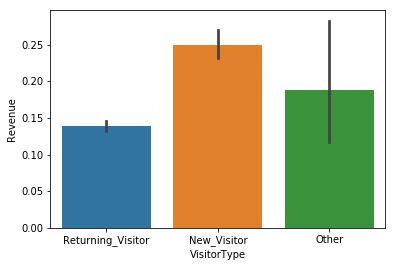

In [119]:
sns.barplot(x="VisitorType", y="Revenue",data=data)

#### Revenue in different regions in weekends?

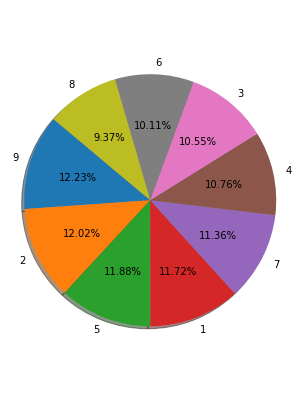

In [115]:
df = data.groupby("Region").mean()[["Revenue","Weekend"]].reset_index().sort_values(by=['Revenue'],ascending=False)
Rev = df["Revenue"].tolist()
Reg = df["Region"].tolist()

# Plot
plt.figure(figsize=(5,7))
plt.pie(Rev, labels=Reg, shadow=True, startangle=140, autopct=make_autopct(Rev))
plt.axis('equal')
plt.show()

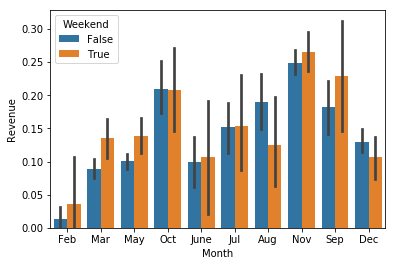

In [123]:
sns.barplot(x='Month', y='Revenue', hue ="Weekend",data = data)

In [153]:
df3 = data.groupby("Region").Revenue.value_counts()
df3

Region  Revenue
1       False      4009
        True        771
2       False       948
        True        188
3       False      2054
        True        349
4       False      1007
        True        175
5       False       266
        True         52
6       False       693
        True        112
7       False       642
        True        119
8       False       378
        True         56
9       False       425
        True         86
Name: Revenue, dtype: int64

#### Special days effect on revenue?

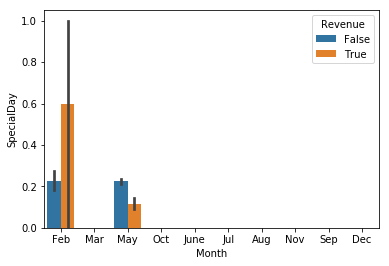

In [120]:
sns.barplot(x="Month", y="SpecialDay", hue = "Revenue",data=data)

#### What is the pattern for purchases in special days?

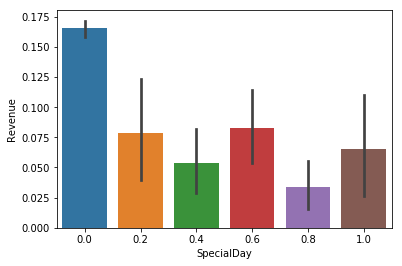

In [121]:
sns.barplot(x="SpecialDay", y="Revenue", data = data)

## 2. Visit Based Analysis

### Which month had the most visit?

In [117]:
data.Month.value_counts()/data.shape[0]

May     0.272830
Nov     0.243147
Mar     0.154663
Dec     0.140065
Oct     0.044526
Sep     0.036334
Aug     0.035118
Jul     0.035036
June    0.023358
Feb     0.014923
Name: Month, dtype: float64

### Rate of BounceRates and ExitRates in different regions?

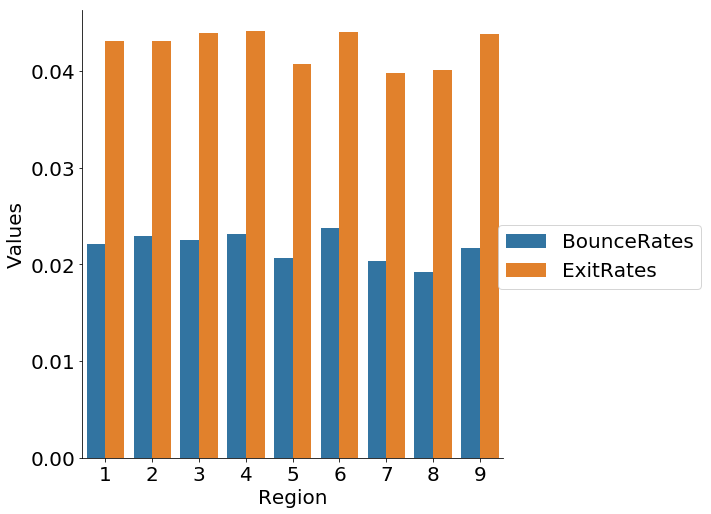

In [16]:
plot_multiple_bar("Region",["BounceRates","ExitRates"],data)

### N products with highest revenue

In [198]:
N = 10
data.groupby(["ProductRelated"]).sum()["Revenue"].reset_index(name = "Highest Rate Products").sort_values(by=["Highest Rate Products"], ascending = False).head(N)

,ProductRelated,Highest Rate Products
10,10,50.0
13,13,45.0
22,22,44.0
14,14,43.0
21,21,42.0
19,19,42.0
8,8,42.0
12,12,40.0
15,15,40.0
17,17,40.0


## Is any product that has no revenue? How many?

In [122]:
df1 = data.groupby("ProductRelated").mean()[["Revenue"]].sort_values(by=['Revenue'],ascending=False)
df2 = df1[df1.Revenue == False]
df2.shape[0]  #86 products had no revenue

86

### Is there multicolinearity problem among the features?

In [124]:
correlationMatrix = data.corr()

for index,rows in correlationMatrix.iterrows():
    for i in rows.index.tolist():
        if index != i and abs(rows[i])>0.5:
            print(index ,'=>',i,":",rows[i])

Administrative => Administrative_Duration : 0.6015833421250285
Administrative_Duration => Administrative : 0.6015833421250285
Informational => Informational_Duration : 0.618954861781397
Informational_Duration => Informational : 0.618954861781397
ProductRelated => ProductRelated_Duration : 0.8609268361763887
ProductRelated_Duration => ProductRelated : 0.8609268361763887
BounceRates => ExitRates : 0.9130043961814553
ExitRates => BounceRates : 0.9130043961814553


### There are two columns with correlation values greater than 0.9. So, I will keep only BounceRates to avoid multicolinearity issue.

In [4]:
new_data = data.drop(labels = "ExitRates", axis = 1)
new_data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems',
       'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend',
       'Revenue'],
      dtype='object')

## Is threre class imbalance issue in dataset?

In [6]:
data.Revenue.value_counts()/data.shape[0]   #Label Imbalance Issue exist in the dataset,
                                            #so accuracy will not be enough as an evaluation matrix!

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

Because of the imbalannce issue, accuracy will not be a good indicator in evaluating the prediction model.
I will use prediction, recall and f1 as main factors in evaluating the models.

## Preparing data to build prediction model

In [5]:
### Independent Variables
x = new_data.iloc[:, :-1]

In [6]:
### dependent variable => Since we only have 2 different categories, those are mapped to 0 and 1.
y = new_data.iloc[:, -1]

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### Although our categorical features do not have ordinal sequence to encode them as numbers and use them,
### we need the transformation in the future to be incoded as numbers in encoding with OneHotEncoder 
labelencoder_x = LabelEncoder()
labelencoder_y = LabelEncoder()
x["VisitorType"] = labelencoder_x.fit_transform(x["VisitorType"])
x["Month"] = labelencoder_x.fit_transform(x["Month"])
x["Weekend"] = labelencoder_x.fit_transform(x["Weekend"])
y = labelencoder_y.fit_transform(y)

In [7]:
# OperatingSystems,Browser, Region, TrafficType, have discrete values but need to be treated as categorical.
onehotencoder = OneHotEncoder(categorical_features = [[9,10,11,12,13,14,15]])
x = onehotencoder.fit_transform(x).toarray()

### Model 1: 
### Logistic Regression Classifier

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
classifier_LR = LogisticRegression(random_state = 0,penalty='l1')
Log_Reg_clf = classifier_LR.fit(x, y)

In [18]:
LR_scores = cross_val_score(Log_Reg_clf, x, y, cv=5, scoring='accuracy')
LR_scores                                              

array([0.89379814, 0.89096068, 0.87956204, 0.87505071, 0.87302231])

###### The mean score and the 95% confidence interval of the score estimate are hence given by:

In [19]:
print("Accuracy for Logistic Regression Model is: %0.2f %% (+/- %0.2f)" % (LR_scores.mean()*100, LR_scores.std() * 2))

Accuracy for Logistic Regression Model is: 88.25 % (+/- 0.02)


In [20]:
# precision, recall and F1
from sklearn.preprocessing import LabelBinarizer
y1 = y
lb = LabelBinarizer()
y1 = np.array([number[0] for number in lb.fit_transform(y1)])
LR_Recall = cross_val_score(classifier_LR, x, y1, cv=5, scoring='recall')
print('LR_Recall =', np.mean(LR_Recall), LR_Recall)
LR_precision = cross_val_score(classifier_LR, x, y1, cv=5, scoring='precision')
print('LR_Precision =', np.mean(LR_precision), LR_precision)
LR_F1 = cross_val_score(classifier_LR, x, y1, cv=5, scoring='f1')
print('LR_F1 =', np.mean(LR_F1), LR_F1)

LR_Recall = 0.3993761251047807 [0.37958115 0.37958115 0.42931937 0.39107612 0.41732283]
LR_Precision = 0.7290539115164794 [0.85294118 0.81920904 0.67489712 0.66222222 0.636     ]
LR_F1 = 0.5129314001864268 [0.52536232 0.51878354 0.5248     0.49174917 0.50396197]


### Model 2:
### KNN Classifier
Feature scalling is requierd!

In [81]:
# Feature Scaling(Normalization) is necessary for KNN classifier
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled= sc.fit_transform(x)

In [22]:
# Fitting K-NN to data
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_clf = classifier_KNN.fit(x_scaled, y)

In [23]:
KNN_scores = cross_val_score(KNN_clf, x_scaled, y, cv=5)
KNN_scores  

array([0.85812728, 0.84677746, 0.8487429 , 0.84056795, 0.831643  ])

In [24]:
print("Accuracy for KNN Model is: %0.2f %% (+/- %0.2f)" % (KNN_scores.mean()*100, KNN_scores.std() * 2))

Accuracy for KNN Model is: 84.52 % (+/- 0.02)


In [25]:
KNN_Recall = cross_val_score(classifier_KNN, x_scaled, y1, cv=5, scoring='recall')
print('KNN_Recall =', np.mean(KNN_Recall), KNN_Recall)
KNN_precision = cross_val_score(classifier_KNN, x_scaled, y1, cv=5, scoring='precision')
print('KNN_Precision =', np.mean(KNN_precision), KNN_precision)
KNN_F1 = cross_val_score(classifier_KNN, x_scaled, y1, cv=5, scoring='f1')
print('KNN_F1 =', np.mean(KNN_F1), KNN_F1)

KNN_Recall = 0.19397424798339996 [0.18324607 0.12565445 0.17015707 0.21784777 0.27296588]
KNN_Precision = 0.5206243124349443 [0.64814815 0.52173913 0.53719008 0.46629213 0.42975207]
KNN_F1 = 0.27550449387388903 [0.28571429 0.20253165 0.2584493  0.29695886 0.33386838]


### Model 3:
### Linear SVM

In [38]:
from sklearn.svm import SVC
classifier_LSVM = SVC(kernel = 'linear', random_state = 0)
LSVM_clf = classifier_LSVM.fit(x_scaled, y1)

In [39]:
LSVM_scores = cross_val_score(LSVM_clf, x_scaled, y1, cv=5)
LSVM_scores

array([0.89704094, 0.89663559, 0.8811841 , 0.86977688, 0.87261663])

In [40]:
print("Accuracy for SVM Model is: %0.2f %% (+/- %0.2f)" % (LSVM_scores.mean()*100, LSVM_scores.std() * 2))

Accuracy for SVM Model is: 88.35 % (+/- 0.02)


In [41]:
print("Accuracy for Linear SVM Model is: %0.2f %% (+/- %0.2f)" % (LSVM_scores.mean()*100, LSVM_scores.std() * 2))
LSVM_Recall = cross_val_score(classifier_LSVM, x_scaled, y1, cv=5, scoring='recall')
print('LSVM_Recall =', np.mean(LSVM_Recall), LSVM_Recall)
LSVM_precision = cross_val_score(classifier_LSVM, x_scaled, y1, cv=5, scoring='precision')
print('LSVM_Precision =', np.mean(LSVM_precision), LSVM_precision)
LSVM_F1 = cross_val_score(classifier_LSVM, x_scaled, y1, cv=5, scoring='f1')
print('LSVM_F1 =', np.mean(LSVM_F1), LSVM_F1)

Accuracy for Linear SVM Model is: 88.35 % (+/- 0.02)
LSVM_Recall = 0.39722691731596377 [0.40314136 0.45549738 0.42408377 0.34383202 0.35958005]
LSVM_Precision = 0.7285196349405432 [0.85555556 0.78733032 0.6893617  0.64851485 0.66183575]
LSVM_F1 = 0.5131329479814805 [0.5480427  0.57711443 0.52512156 0.44939966 0.46598639]


### Model 4:
### Kernel SVM

In [42]:
classifier_Kernel_SVM = SVC(kernel = 'rbf', random_state = 0)
Kernel_SVM_clf = classifier_Kernel_SVM.fit(x_scaled, y1)
Kernel_SVM_scores = cross_val_score(Kernel_SVM_clf, x_scaled, y1, cv=5)
print("Accuracy for Kernel SVM Model is: %0.2f %% (+/- %0.2f)" % (Kernel_SVM_scores.mean()*100, Kernel_SVM_scores.std() * 2))
Kernel_SVM_Recall = cross_val_score(classifier_Kernel_SVM, x_scaled, y1, cv=5, scoring='recall')
print('Kernel_SVM_Recall =', np.mean(Kernel_SVM_Recall), Kernel_SVM_Recall)
Kernel_SVM_precision = cross_val_score(classifier_Kernel_SVM, x_scaled, y1, cv=5, scoring='precision')
print('Kernel_SVM_Precision =', np.mean(Kernel_SVM_precision), Kernel_SVM_precision)
Kernel_SVM_F1 = cross_val_score(classifier_Kernel_SVM, x_scaled, y1, cv=5, scoring='f1')
print('Kernel_SVM_F1 =', np.mean(Kernel_SVM_F1), Kernel_SVM_F1)

Accuracy for Kernel SVM Model is: 88.36 % (+/- 0.02)
Kernel_SVM_Recall = 0.3747110799631721 [0.39790576 0.41884817 0.35863874 0.33333333 0.3648294 ]
Kernel_SVM_Precision = 0.7508424256107207 [0.88372093 0.7960199  0.73655914 0.67914439 0.65876777]
Kernel_SVM_F1 = 0.4993587197328308 [0.54873646 0.54888508 0.48239437 0.4471831  0.46959459]


### Model 5:
### Naive Bayes

##### In Naive Bayes Classifier we prefer Categorical data. So, I will convert Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, PageValues, SpecialDay, into 4 groups based on their Q1,Q2,Q3,Q4! To avoid imbalance issue!

In [27]:
# The function to convert numerical variables to 4 groups
def to_4_categories(column):
    
    Q1 = np.percentile(column,25)
    Q2 = np.percentile(column,50)
    Q3 = np.percentile(column,75)
    
    c1,c2,c3,c4 = ([] for i in range(4))
    
    for i in range(0,len(column)):

        if column[i] <= Q1:
           c1.append(column[i])
        if column[i] <= Q2 and column[i] > Q1:
           c2.append(column[i])
        if column[i] <= Q3 and column[i] > Q2:
           c3.append(column[i])
        if column[i] > Q3:
           c4.append(column[i])

    e1 = round(np.mean(c1),2) 
    e2 = round(np.mean(c2),2) 
    e3 = round(np.mean(c3),2)
    e4 = round(np.mean(c4),2)

    for i in range(0,len(column)):
        if column[i] in c1:
           column[i] = e1
        if column[i] in c2:
           column[i] = e2
        if column[i] in c3:
           column[i] = e3
        if column[i] in c4:
           column[i] = e4

In [29]:
x_NB = new_data.iloc[:, :-1]
for i in range(0,9):
    to_4_categories(x_NB[x_NB.columns[i]])

C:\Users\nasta\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\nasta\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\nasta\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\nasta\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [36]:
# Encoding categorical Data to numerical
x_NB["VisitorType"] = labelencoder_x.fit_transform(x_NB["VisitorType"])
x_NB["Month"] = labelencoder_x.fit_transform(x_NB["Month"])
x_NB["Weekend"] = labelencoder_x.fit_transform(x_NB["Weekend"])

In [37]:
x_NB.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,3,66.26,0.08,0.0,0.0,2,1,1,1,1,2,0
1,0,0.0,0,0.0,3,66.26,0.00,0.0,0.0,2,2,2,1,2,2,0
2,0,0.0,0,0.0,3,66.26,0.08,0.0,0.0,2,4,1,9,3,2,0
3,0,0.0,0,0.0,3,66.26,0.08,0.0,0.0,2,3,2,2,4,2,0
4,0,0.0,0,0.0,12,967.33,0.08,0.0,0.0,2,3,3,1,4,2,1


In [35]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
NB_clf = classifier_NB.fit(x_NB, y1)
NB_scores = cross_val_score(NB_clf, x_NB, y1, cv=5)
print("Accuracy for Naive Bayes Model is: %0.2f %% (+/- %0.2f)" % (NB_scores.mean()*100, NB_scores.std() * 2))
NB_Recall = cross_val_score(classifier_NB, x_NB, y1, cv=5, scoring='recall')
print('NB_Recall =', np.mean(NB_Recall), NB_Recall)
NB_precision = cross_val_score(classifier_NB, x_NB, y1, cv=5, scoring='precision')
print('NB_Precision =', np.mean(NB_precision), NB_precision)
NB_F1 = cross_val_score(classifier_NB, x_NB, y1, cv=5, scoring='f1')
print('NB_F1 =', np.mean(NB_F1), NB_F1)

Accuracy for Naive Bayes Model is: 84.44 % (+/- 0.07)
NB_Recall = 0.7510107048137308 [0.87434555 0.70418848 0.7460733  0.73753281 0.69291339]
NB_Precision = 0.5048973957966673 [0.64728682 0.52952756 0.43378995 0.4390625  0.47482014]
NB_F1 = 0.6021830731478157 [0.74387528 0.60449438 0.54860443 0.55044074 0.56350053]


### Model 6:
### Decision Tree

In [48]:
from sklearn import tree
classifier_DT = tree.DecisionTreeClassifier()
DT_clf = classifier_DT.fit(x, y1)
DT_scores = cross_val_score(DT_clf, x, y1, cv=5)
print("Accuracy for Decision Tree Model is: %0.2f %% (+/- %0.2f)" % (DT_scores.mean()*100, DT_scores.std() * 2))
DT_Recall = cross_val_score(classifier_DT, x, y1, cv=5, scoring='recall')
print('DT_Recall =', np.mean(DT_Recall), DT_Recall)
DT_precision = cross_val_score(classifier_DT, x, y1, cv=5, scoring='precision')
print('DT_Precision =', np.mean(DT_precision), DT_precision)
DT_F1 = cross_val_score(classifier_DT, x, y1, cv=5, scoring='f1')
print('DT_F1 =', np.mean(DT_F1), DT_F1)

Accuracy for Decision Tree Model is: 84.88 % (+/- 0.08)
DT_Recall = 0.5529125613225048 [0.54450262 0.58638743 0.57068063 0.51181102 0.5511811 ]
DT_Precision = 0.5261381059068829 [0.6509434  0.68955224 0.46666667 0.41052632 0.41300191]
DT_F1 = 0.5358917654518462 [0.59714286 0.62464986 0.52173913 0.46833931 0.46758767]


#### Another attempt with data preprocessing
#### Data preprocessing will be same to Naive Bayes Algorithm. 
#### Numerical data will be convert to 4 groups based on its own Q1, Q2, Q3!
#### Categorical data is encoded!

In [47]:
x_DT = x_NB
classifier_DT = tree.DecisionTreeClassifier()
DT_clf = classifier_DT.fit(x_DT, y1)
DT_scores = cross_val_score(DT_clf, x_DT, y1, cv=5)
print("Accuracy for Decision Tree Model is: %0.2f %% (+/- %0.2f)" % (DT_scores.mean()*100, DT_scores.std() * 2))
DT_Recall = cross_val_score(classifier_DT, x_DT, y1, cv=5, scoring='recall')
print('DT_Recall =', np.mean(DT_Recall), DT_Recall)
DT_precision = cross_val_score(classifier_DT, x_DT, y1, cv=5, scoring='precision')
print('DT_Precision =', np.mean(DT_precision), DT_precision)
DT_F1 = cross_val_score(classifier_DT, x_DT, y1, cv=5, scoring='f1')
print('DT_F1 =', np.mean(DT_F1), DT_F1)

Accuracy for Decision Tree Model is: 84.22 % (+/- 0.07)
DT_Recall = 0.540869302331973 [0.54188482 0.57068063 0.53141361 0.50656168 0.55380577]
DT_Precision = 0.5166336293397538 [0.63344051 0.68454259 0.45733042 0.40466102 0.40319361]
DT_F1 = 0.5196654989554479 [0.57018813 0.60658083 0.50241546 0.44935972 0.46978335]


First Decision Tree model is better.

### Model 7:
### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=0)
RF_clf = classifier_RF.fit(x, y1)
RF_scores = cross_val_score(RF_clf, x, y1, cv=5)
print("Accuracy for Random Forest Model is: %0.2f %% (+/- %0.2f)" % (RF_scores.mean()*100, RF_scores.std() * 2))
RF_Recall = cross_val_score(classifier_RF, x, y1, cv=5, scoring='recall')
print('RF_Recall =', np.mean(RF_Recall), RF_Recall)
RF_precision = cross_val_score(classifier_RF, x, y1, cv=5, scoring='precision')
print('RF_Precision =', np.mean(RF_precision), RF_precision)
RF_F1 = cross_val_score(classifier_RF, x, y1, cv=5, scoring='f1')
print('RF_F1 =', np.mean(RF_F1), RF_F1)

Accuracy for Random Forest Model is: 85.73 % (+/- 0.00)
RF_Recall = 0.08860122851135754 [0.06282723 0.06544503 0.08638743 0.09448819 0.13385827]
RF_Precision = 0.9248717948717948 [1.         1.         0.91666667 0.92307692 0.78461538]
RF_F1 = 0.1598199167351056 [0.1182266  0.12285012 0.15789474 0.17142857 0.22869955]


In [51]:
classifier_RF2 = RandomForestClassifier(n_estimators=100, max_depth=8,random_state=0)
RF2_clf = classifier_RF2.fit(x, y1)
RF2_scores = cross_val_score(RF2_clf, x, y1, cv=5)
print("Accuracy for Random Forest Model is: %0.2f %% (+/- %0.2f)" % (RF2_scores.mean()*100, RF2_scores.std() * 2))
RF2_Recall = cross_val_score(classifier_RF2, x_scaled, y1, cv=5, scoring='recall')
print('RF2_Recall =', np.mean(RF2_Recall), RF2_Recall)
RF2_precision = cross_val_score(classifier_RF2, x, y1, cv=5, scoring='precision')
print('RF2_Precision =', np.mean(RF2_precision), RF2_precision)
RF2_F1 = cross_val_score(classifier_RF2, x, y1, cv=5, scoring='f1')
print('RF2_F1 =', np.mean(RF2_F1), RF2_F1)

Accuracy for Random Forest Model is: 88.79 % (+/- 0.02)
RF2_Recall = 0.34904426213738987 [0.27748691 0.38219895 0.41099476 0.2992126  0.37532808]
RF2_Precision = 0.8338565988144115 [0.92173913 0.90123457 0.83510638 0.77027027 0.74093264]
RF2_F1 = 0.48869219701641053 [0.42655936 0.53676471 0.55087719 0.43100189 0.49825784]


In [52]:
classifier_RF3 = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0)
RF3_clf = classifier_RF3.fit(x, y1)
RF3_scores = cross_val_score(RF3_clf, x, y1, cv=5)
print("Accuracy for Random Forest Model is: %0.2f %% (+/- %0.2f)" % (RF3_scores.mean()*100, RF3_scores.std() * 2))
RF3_Recall = cross_val_score(classifier_RF3, x_scaled, y1, cv=5, scoring='recall')
print('RF3_Recall =', np.mean(RF3_Recall), RF3_Recall)
RF3_precision = cross_val_score(classifier_RF3, x, y1, cv=5, scoring='precision')
print('RF3_Precision =', np.mean(RF3_precision), RF3_precision)
RF3_F1 = cross_val_score(classifier_RF3, x, y1, cv=5, scoring='f1')
print('RF3_F1 =', np.mean(RF3_F1), RF3_F1)

Accuracy for Random Forest Model is: 89.29 % (+/- 0.02)
RF3_Recall = 0.4302799191985819 [0.35078534 0.46596859 0.5        0.35958005 0.47506562]
RF3_Precision = 0.7907841535286634 [0.91156463 0.86407767 0.77016129 0.71727749 0.69083969]
RF3_F1 = 0.5520829244880401 [0.50661626 0.60544218 0.60634921 0.47902098 0.562986  ]


In [53]:
Accuracies = [round(LR_scores.mean()*100,2),
              round(KNN_scores.mean()*100,2),
              round(LSVM_scores.mean()*100,2),
              round(Kernel_SVM_scores.mean()*100,2),
              round(NB_scores.mean()*100,2),
              round(DT_scores.mean()*100,2),
              round(RF3_scores.mean()*100,2)]
Accuracies

[88.25, 84.52, 88.35, 88.36, 84.44, 84.88, 89.29]

In [54]:
Classifiers = ["Logistic Regression", "K-Nearest Neighbor", "Linear SVM", "Kernel SVM", "Naive Bayes","Decision Tree", "Random Forest"]
df = pd.DataFrame(list(zip(Classifiers, Accuracies)), columns = ["Model", "Accuracy"])
df

,Model,Accuracy
0,Logistic Regression,88.25
1,K-Nearest Neighbor,84.52
2,Linear SVM,88.35
3,Kernel SVM,88.36
4,Naive Bayes,84.44
5,Decision Tree,84.88
6,Random Forest,89.29


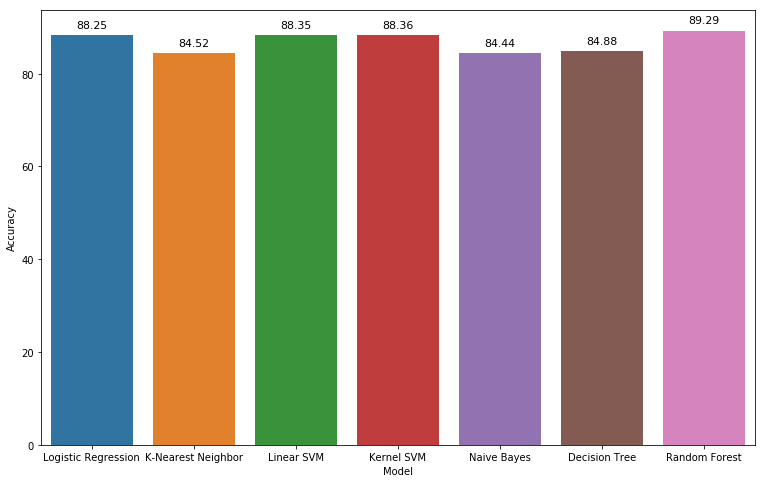

In [55]:
fig,ax = plt.subplots()
fig.set_size_inches(16,8)

#to get different colors for each of the variable assign the variable to hue
g=sns.barplot(x='Model',y='Accuracy',data=df,ax=ax)

#Code for to put legend outside the plot
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adding respective values to the top of each bar
for p in ax.patches: 
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 10), 
                textcoords='offset points')

#To save the plot as 'SO.png'    
plt.savefig('SO.png',dpi=100,bbox_inches='tight')
plt.show()

In [61]:
Precisions = [round(np.mean(LR_precision),2),
              round(np.mean(KNN_precision),2),
              round(np.mean(LSVM_precision),2),
              round(np.mean(Kernel_SVM_precision),2),
              round(np.mean(NB_precision),2),
              round(np.mean(DT_precision),2),
              round(np.mean(RF3_precision),2)]

Recalls = [round(np.mean(LR_Recall),2),
              round(np.mean(KNN_Recall),2),
              round(np.mean(LSVM_Recall),2),
              round(np.mean(Kernel_SVM_Recall),2),
              round(np.mean(NB_Recall),2),
              round(np.mean(DT_Recall),2),
              round(np.mean(RF3_Recall),2)]

F1s = [round(np.mean(LR_F1),2),
              round(np.mean(KNN_F1),2),
              round(np.mean(LSVM_F1),2),
              round(np.mean(Kernel_SVM_F1),2),
              round(np.mean(NB_F1),2),
              round(np.mean(DT_F1),2),
              round(np.mean(RF3_F1),2)]

df1 = pd.DataFrame(list(zip(Classifiers, Precisions, Recalls, F1s)), columns = ["Model", "Precision", "Recall", "F1"])
df1

,Model,Precision,Recall,F1
0,Logistic Regression,0.73,0.40,0.51
1,K-Nearest Neighbor,0.52,0.19,0.28
2,Linear SVM,0.73,0.40,0.51
3,Kernel SVM,0.75,0.37,0.50
4,Naive Bayes,0.50,0.75,0.60
5,Decision Tree,0.53,0.55,0.54
6,Random Forest,0.79,0.43,0.55


In [65]:
#col should be less than 15 categories 
def plot_multiple_bar2(col,list_of_measures,dataframe):
    
    temp_df = dataframe.groupby([col]).mean()[list_of_measures].reset_index()
    temp_df_melt = pd.melt(temp_df, id_vars=col, var_name="Parameters", value_name="Values")
    g =sns.factorplot(x=col, y='Values',hue ='Parameters', data=temp_df_melt, kind='bar',legend=False,size =7)
    g.set_xticklabels(fontsize='10')
    g.set_yticklabels(fontsize='20')
    g.set_xlabels(fontsize='10')
    g.set_ylabels(fontsize='20')
    g.add_legend(fontsize='20')
    g.set_xticklabels( rotation=40, ha="right")

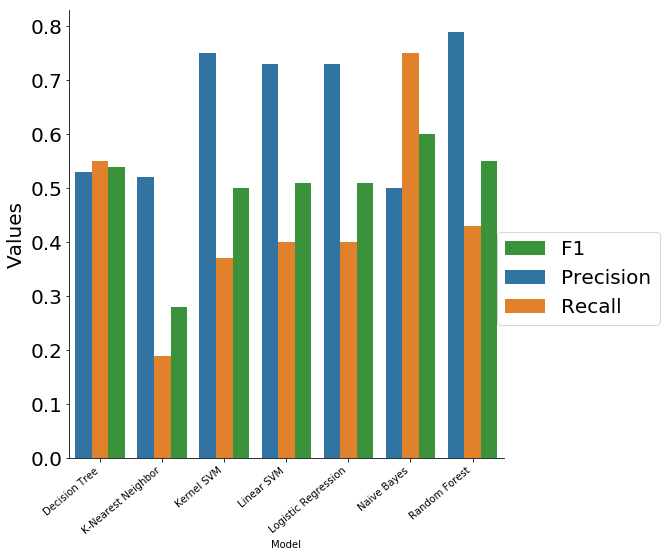

In [66]:
plot_multiple_bar2("Model",["Precision","Recall","F1"],df1)

Conclusion:
    As we can see, in terms of accuracy Random Forest has the highest value!
    But, since there are inbalance label issue in data set, F1 is a better indicator.
    So, because Naive bayes and Random Forest are too close in terms of F1-score, 5% difference, we can say these two model are     better.

#### Applying Feature Reduction Techniques:

In [9]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components = None)
x_pca = pca.fit_transform(x)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.87741138e-01, 7.54401188e-03, 4.48203268e-03, 1.37699720e-04,
       9.21287618e-05, 1.62772695e-06, 2.37630354e-07, 1.44178011e-07,
       9.96124052e-08, 9.04027985e-08, 8.01390084e-08, 7.68406048e-08,
       6.99179949e-08, 5.44818358e-08, 5.00875774e-08, 4.25165560e-08,
       3.96928028e-08, 3.80084362e-08, 3.08425225e-08, 2.64075381e-08,
       2.50437881e-08, 2.03242715e-08, 1.90824501e-08, 1.73149329e-08,
       1.65110765e-08, 1.46498003e-08, 1.30512666e-08, 1.22468966e-08,
       1.17937690e-08, 1.09558120e-08, 1.01348158e-08, 9.59025510e-09,
       9.39002095e-09, 9.13164825e-09, 8.09681403e-09, 7.88577346e-09,
       7.31796733e-09, 7.12169636e-09, 6.61713140e-09, 6.33604641e-09,
       5.50633243e-09, 5.37810735e-09, 4.81064351e-09, 4.02792459e-09,
       3.62584754e-09, 2.50069752e-09, 2.46100982e-09, 2.00309015e-09,
       1.15971100e-09, 1.08240610e-09, 8.79123260e-10, 8.69603511e-10,
       8.36120293e-10, 5.34966463e-10, 4.97082003e-10, 3.95714935e-10,
      

In [24]:
pca_ = PCA(n_components = 3)
x_pca_ = pca_.fit_transform(x)
explained_variance_ = pca_.explained_variance_ratio_
explained_variance_

array([0.98774114, 0.00754401, 0.00448203])

In [33]:
classifier_RF_PCA = RandomForestClassifier(n_estimators=100,random_state=0)
RF_PCA_clf = classifier_RF_PCA.fit(x_pca_, y1)
RF_PCA_scores = cross_val_score(RF_PCA_clf, x_pca_, y1, cv=5)
print("Accuracy for Random Forest Model is: %0.2f %% (+/- %0.2f)" % (RF_PCA_scores.mean()*100, RF_PCA_scores.std() * 2))
RF_PCA_Recall = cross_val_score(classifier_RF_PCA, x_pca_, y1, cv=5, scoring='recall')
print('RF_PCA_Recall =', np.mean(RF_PCA_Recall), RF_PCA_Recall)
RF_PCA_precision = cross_val_score(classifier_RF_PCA, x_pca_, y1, cv=5, scoring='precision')
print('RF_PCA_Precision =', np.mean(RF_PCA_precision), RF_PCA_precision)
RF_PCA_F1 = cross_val_score(classifier_RF_PCA, x_pca_, y1, cv=5, scoring='f1')
print('RF_PCA_F1 =', np.mean(RF_PCA_F1), RF_PCA_F1)

Accuracy for Random Forest Model is: 82.42 % (+/- 0.01)
RF_PCA_Recall = 0.08177295900839619 [0.07853403 0.06806283 0.07591623 0.09448819 0.09186352]
RF_PCA_Precision = 0.27851729840953504 [0.36144578 0.26530612 0.232      0.27067669 0.26315789]
RF_PCA_F1 = 0.1256057209856536 [0.12903226 0.10833333 0.11439842 0.14007782 0.13618677]


In [31]:
from sklearn.preprocessing import LabelBinarizer
y1 = y
lb = LabelBinarizer()
y1 = np.array([number[0] for number in lb.fit_transform(y1)])


### Clustering

In [19]:
# KMean clustering
from sklearn.cluster import KMeans

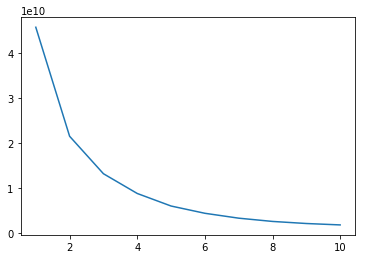

In [20]:
# Using elbow method To find optimal number of clusters:
WCSS = []
for i in range (1,11):
    KMean = KMeans(n_clusters = i, init ='k-means++', n_init=10, max_iter=300, random_state = 42)
    KMean.fit(x)
    WCSS.append(KMean.inertia_)
plt.plot(range(1,11),WCSS)

In [21]:
# Optimal number of clusters = 5
KMean = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state = 42)
y_KMean = KMean.fit_predict(x) # in 3 different clusters from 0 to 4

In [22]:
np.unique(KMean.labels_)

array([0, 1, 2, 3, 4])

In [23]:
x = pd.DataFrame(x)

In [24]:
x['Cluster_kmean'] = pd.Series(KMean.labels_)

In [25]:
cluster_0_kmean = x["Cluster_kmean"].isin([0])
cluster_0_kmean = x[cluster_0_kmean] 
cluster_0_kmean.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Cluster_hc,Cluster_kmean
0,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,2,1,1,1,1,2,0,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.0,0.0,2,2,2,1,2,2,0,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,2,4,1,9,3,2,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.0,0.0,2,3,2,2,4,2,0,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.0,0.0,2,3,3,1,4,2,1,1,0


In [26]:
cluster_1_kmean = x["Cluster_kmean"].isin([1])
cluster_1_kmean = x[cluster_1_kmean] 
cluster_1_kmean.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Cluster_hc,Cluster_kmean
40,1,9.000000,0,0.0,46,4084.393939,0.000000,0.0,0.0,2,2,2,8,4,2,0,2,1
66,4,44.000000,0,0.0,90,6951.972222,0.002151,0.0,0.0,2,4,1,1,3,2,0,0,1
109,6,326.250000,4,94.0,128,5062.213753,0.000855,0.0,0.0,2,2,5,1,3,2,0,2,1
187,10,293.778205,2,153.0,96,3283.166739,0.001961,0.0,0.0,5,3,2,6,2,2,1,2,1
191,3,1226.000000,5,3.0,24,3230.250000,0.036190,0.0,0.0,5,2,2,1,2,2,0,2,1


In [27]:
cluster_2_kmean = x["Cluster_kmean"].isin([2])
cluster_2_kmean = x[cluster_2_kmean] 
cluster_2_kmean.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Cluster_hc,Cluster_kmean
5152,17,2629.253968,24,2050.433333,705,43171.23338,0.004851,0.763829,0.0,6,2,2,1,14,2,1,0,2
5916,12,245.733333,4,1511.700000,439,21857.04648,0.003589,11.439233,0.0,9,2,2,1,13,2,0,0,2
6165,10,2407.423810,3,434.300000,486,23050.10414,0.000324,0.000000,0.0,3,2,2,1,3,2,0,0,2
6684,20,199.456273,7,299.033333,686,23342.08205,0.009853,0.150650,0.0,0,2,2,1,1,2,0,0,2
7662,10,1251.200000,7,250.000000,414,23888.81000,0.009900,1.033757,0.0,9,2,2,4,13,2,0,0,2


In [28]:
cluster_3_kmean = x["Cluster_kmean"].isin([3])
cluster_3_kmean = x[cluster_3_kmean] 
cluster_3_kmean.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Cluster_hc,Cluster_kmean
15,2,53.0,0,0.0,23,1668.285119,0.008333,0.000000,0.0,2,1,1,9,3,2,0,1,3
19,0,0.0,0,0.0,20,2981.166667,0.000000,0.000000,0.0,2,2,4,4,4,2,0,2,3
26,4,64.6,0,0.0,32,1135.444444,0.002857,0.000000,0.0,2,2,2,1,3,2,0,1,3
29,1,6.0,1,0.0,45,1582.750000,0.043478,54.179764,0.4,2,3,2,1,1,2,0,1,3
35,0,0.0,0,0.0,52,2086.242857,0.015385,0.000000,0.0,2,2,2,7,1,2,0,1,3


In [29]:
cluster_4_kmean = x["Cluster_kmean"].isin([4])
cluster_4_kmean = x[cluster_4_kmean] 
cluster_4_kmean.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Cluster_hc,Cluster_kmean
510,14,416.392857,6,449.333333,258,11301.204160,0.000000,33.611792,0.0,5,2,4,9,2,2,0,0,4
799,10,316.140502,7,321.666667,287,12983.787710,0.000669,1.088158,0.0,5,2,4,3,8,0,0,0,4
1037,1,24.000000,3,125.500000,65,8646.000000,0.000000,0.000000,0.0,5,2,2,1,13,2,1,0,4
1146,3,184.688889,0,0.000000,129,7669.250794,0.000000,0.000000,0.0,5,2,2,8,13,2,0,0,4
1207,5,710.333333,0,0.000000,23,7533.272727,0.000000,0.000000,0.0,5,2,2,1,2,2,0,0,4


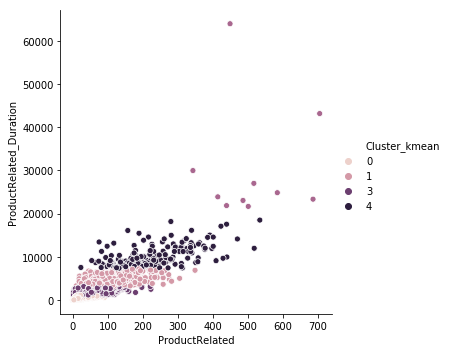

In [30]:
sns.relplot(x="ProductRelated", y="ProductRelated_Duration", hue="Cluster_kmean", data=x)

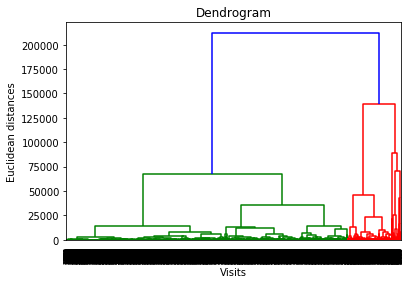

In [8]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Visits')
plt.ylabel('Euclidean distances')
plt.show()

In [9]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

In [10]:
x['Cluster_hc'] = pd.Series(hc.labels_)

In [11]:
x['Cluster_hc'].unique()

array([1, 2, 0], dtype=int64)

In [12]:
cluster_0_hc = x["Cluster_hc"].isin([0])
cluster_0_hc = x[cluster_0_hc] 
cluster_0_hc.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Cluster_hc
66,4,44.000000,0,0.000000,90,6951.972222,0.002151,0.000000,0.0,2,4,1,1,3,2,0,0
510,14,416.392857,6,449.333333,258,11301.204160,0.000000,33.611792,0.0,5,2,4,9,2,2,0,0
611,16,315.144986,6,147.866667,173,6255.017866,0.002531,0.000000,0.0,5,2,2,2,2,2,0,0
619,13,374.875000,1,53.000000,88,5958.071931,0.002105,0.000000,0.0,5,2,2,3,2,2,0,0
769,15,937.174603,3,357.000000,109,6682.677557,0.000833,2.526617,0.0,5,1,2,3,2,2,0,0


In [13]:
cluster_1_hc = x["Cluster_hc"].isin([1])
cluster_1_hc = x[cluster_1_hc] 
cluster_1_hc.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Cluster_hc
0,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,2,1,1,1,1,2,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.0,0.0,2,2,2,1,2,2,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,2,4,1,9,3,2,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.0,0.0,2,3,2,2,4,2,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.0,0.0,2,3,3,1,4,2,1,1


In [14]:
cluster_2_hc = x["Cluster_hc"].isin([2])
cluster_2_hc = x[cluster_2_hc] 
cluster_2_hc.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Cluster_hc
19,0,0.000000,0,0.0,20,2981.166667,0.000000,0.0,0.0,2,2,4,4,4,2,0,2
40,1,9.000000,0,0.0,46,4084.393939,0.000000,0.0,0.0,2,2,2,8,4,2,0,2
100,3,18.333333,0,0.0,38,2635.177778,0.000000,0.0,0.4,2,2,4,1,2,2,0,2
109,6,326.250000,4,94.0,128,5062.213753,0.000855,0.0,0.0,2,2,5,1,3,2,0,2
187,10,293.778205,2,153.0,96,3283.166739,0.001961,0.0,0.0,5,3,2,6,2,2,1,2


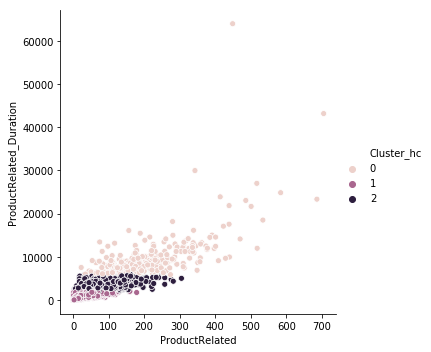

In [16]:
sns.relplot(x="ProductRelated", y="ProductRelated_Duration", hue="Cluster_hc", data=x)